In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('../input/bostonhoustingmlnd/housing.csv')   
data.head()

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


# Predicting Boston Housing Prices

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RM,489.0,6.240288,0.643650,3.561,5.88,6.185,6.575,8.398
LSTAT,489.0,12.939632,7.081990,1.980,7.37,11.690,17.120,37.970
PTRATIO,489.0,18.516564,2.111268,12.600,17.40,19.100,20.200,22.000
MEDV,489.0,454342.944785,165340.277653,105000.000,350700.00,438900.000,518700.000,1024800.000


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

1. _Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?_ - As the number of rooms increases, in most of the cases, the Floor Area increases which in-turn increases the price of the house. So, a house that has an `'RM'` value(number of rooms) of 6 will have a lesser worth than a home that has an `'RM'` value of 7. (`'RM` vs `'Price'` is a Positive Correlation)
2. _Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?_ - Usually, high-class socities tend to have a higher home prices. So, as the percent of lower class workers decreases, the price of the house will increase. In this case, a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices worth more than a neighborhood that has an `'LSTAT'` value of 20. (`'LSTAT'` vs `'Price'` is a Negative Correlation)
3. _Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?_ - Usually, the ratio of teachers to students will be less in good schools and these good schools are mostly located in high class neighbours which have houses of high price. So, in our case a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more than a neighborhood that has an `'PTRATIO'` value of 15. (`'PTRATIO'` vs `'Price'` is a Negative Correlation)

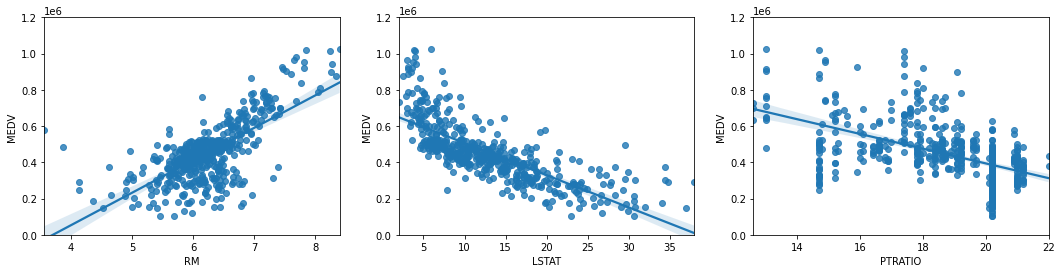

In [4]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))

for i in range(len(axs)):
    axs[i].set_ylim([0, 1200000])
# RM vs Price
_ = sns.regplot(x=data['RM'], y=data.MEDV, ax=axs[0])
# LSSAT vs Price
_ = sns.regplot(x=data['LSTAT'], y=data.MEDV, ax=axs[1])
# PTRATIO vs Price
_ = sns.regplot(x=data['PTRATIO'], y=data.MEDV, ax=axs[2])

plt.show();


## Developing a Model

In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [6]:
data = data.dropna()
y = data["MEDV"]
X = data.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [8]:
knn_model

KNeighborsRegressor()

In [9]:
knn_model.n_neighbors

5

In [10]:
knn_model.effective_metric_

'euclidean'

# Prediction

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test, y_pred))

66014.27539629259

In [13]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)



k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  49947.98154736323
k = 3 için RMSE değeri:  58932.37603690514
k = 4 için RMSE değeri:  64109.28961035415
k = 5 için RMSE değeri:  67299.14970354138
k = 6 için RMSE değeri:  70257.4674190728
k = 7 için RMSE değeri:  72088.02508500103
k = 8 için RMSE değeri:  73760.01523584586
k = 9 için RMSE değeri:  74829.23729464547
k = 10 için RMSE değeri:  75749.72775474531


# Model Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [16]:
knn = KNeighborsRegressor()

In [17]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [18]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [19]:
knn_cv_model.best_params_["n_neighbors"]

6

In [20]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  98957.48974699706
k = 2 için RMSE değeri:  49947.98154736323 RMSE_CV değeri:  88663.7797212563
k = 3 için RMSE değeri:  58932.37603690514 RMSE_CV değeri:  84542.44140459069
k = 4 için RMSE değeri:  64109.28961035415 RMSE_CV değeri:  84563.69878896985
k = 5 için RMSE değeri:  67299.14970354138 RMSE_CV değeri:  85086.31431383964
k = 6 için RMSE değeri:  70257.4674190728 RMSE_CV değeri:  83763.82169909714
k = 7 için RMSE değeri:  72088.02508500103 RMSE_CV değeri:  84003.80839178855
k = 8 için RMSE değeri:  73760.01523584586 RMSE_CV değeri:  84551.63967073194
k = 9 için RMSE değeri:  74829.23729464547 RMSE_CV değeri:  84721.02345481845
k = 10 için RMSE değeri:  75749.72775474531 RMSE_CV değeri:  84565.957115765


In [21]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [22]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [23]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

65936.06628695993

# SVR (Support Vector Regression)

In [24]:
from sklearn.svm import SVR

In [25]:
svr_model = SVR("linear").fit(X_train, y_train)

In [26]:
svr_model.predict(X_train)[0:5]

array([416116.5976635, 449697.7732695, 462416.1531915, 451406.0025475,
       465955.5868155])

In [27]:
print ("y = {0} + {1} x + {2} x + {3} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0],svr_model.coef_[0][1],svr_model.coef_[0][2])) 

y = 477493.621963501 + 127.92200000000004 x + -1700.5699999999997 x + -376.9999999999999 x


In [28]:
X_train[0:1]

,RM,LSTAT,PTRATIO
370,5.0,31.99,20.2


In [29]:
svr_model.intercept_

array([477493.6219635])

In [30]:
svr_model.coef_

array([[  127.922, -1700.57 ,  -377.   ]])

In [31]:
y_pred = svr_model.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

141437.09050706634

In [33]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [34]:
svr_model

SVR(kernel='linear')

In [35]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [36]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [37]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [38]:
y_pred = svr_tuned.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

133921.00429432184

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

133921.00429432184

# Non-Linear SVR

In [41]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [42]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

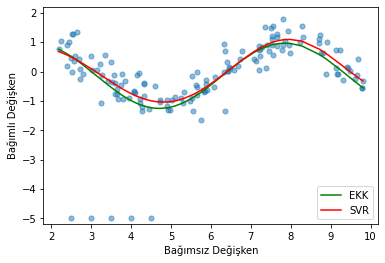

In [43]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [44]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

# Prediction

In [45]:
y_pred = svr_rbf.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

150299.8372394132

# Model Tuning

In [47]:
svr_rbf

SVR()

In [48]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [49]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [50]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)



In [51]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

148402.87960375656

# MLP Regression

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [54]:
X_train_scaled = scaler.transform(X_train)

In [55]:
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.neural_network import MLPRegressor

In [57]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [58]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [59]:
mlp_model.n_layers_

4

In [60]:
mlp_model.hidden_layer_sizes

(100, 20)

# Prediction

In [61]:
y_pred = mlp_model.predict(X_test_scaled)

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred))

448563.4580956707

# Model Tuning

In [63]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [64]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [65]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [66]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [67]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [68]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (300,200,150))

In [69]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [70]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

237650.5176118241

# CART

In [73]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [74]:
?cart_model

In [75]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [78]:
!pip install skompiler

^C


In [79]:
cart_model.predict(X_test)[0:5]

array([399000., 590100., 201600., 199500., 199500.])

In [81]:
y_pred =cart_model.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

79909.32818956318

# Model Tuning

In [83]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [84]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [85]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [86]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [87]:
cart_cv_model.best_params_

{'max_leaf_nodes': 8, 'min_samples_split': 2}

In [88]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [89]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [90]:
y_pred = cart_tuned.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

70309.05618288349

# Bagged Trees Regression

In [92]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [93]:
bag_model.n_estimators

10

In [94]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=559205294),
 DecisionTreeRegressor(random_state=1093908291),
 DecisionTreeRegressor(random_state=382868911),
 DecisionTreeRegressor(random_state=1798677718),
 DecisionTreeRegressor(random_state=439412983),
 DecisionTreeRegressor(random_state=579783055),
 DecisionTreeRegressor(random_state=946174799),
 DecisionTreeRegressor(random_state=1511392073),
 DecisionTreeRegressor(random_state=1337317853),
 DecisionTreeRegressor(random_state=199203542)]

In [95]:
bag_model.estimators_samples_

[array([166,  25,  11, 144, 251,  28, 209, 113, 218, 242, 220, 211,  56,
        179, 192, 247, 234,  17, 186,  96, 161, 311,  83, 307, 120, 226,
         26, 342, 350, 309, 146, 256, 215, 193,  83, 170, 140, 361, 105,
         30, 211, 286,  52, 131, 210, 165, 119, 336,   1, 280, 337, 293,
        132, 130, 169,  83, 171, 275, 126, 339,  66, 360, 256,  66,  83,
        292, 215,  92, 121, 179,  57, 362, 310, 109, 323, 359, 220, 150,
         58, 108, 356, 326, 139, 207,  85,  54, 186, 223, 303, 117, 186,
         90, 122, 332, 298, 261,  24, 325, 237,  31, 328, 182, 214, 255,
        361,  71,  42, 125, 175, 351, 274, 209, 131,  39,   7,  44, 251,
        105, 125, 291, 129, 213, 193, 187,   6,  35,  64, 294, 328, 244,
         85,  96,  48, 109, 338, 224, 365,  70, 250, 216, 281, 201,  85,
         56, 129,  84, 221, 243, 283, 347, 318, 255, 352, 310, 210,  69,
        340, 348, 257,  48, 313, 277, 197, 196, 218, 107, 191, 222,  21,
        111, 195, 143, 194, 152,  38, 353, 186, 321

In [96]:
bag_model.estimators_features_

[array([2, 1, 2]),
 array([1, 1, 0]),
 array([1, 0, 0]),
 array([2, 0, 1]),
 array([1, 1, 1]),
 array([1, 2, 0]),
 array([0, 2, 2]),
 array([1, 1, 2]),
 array([1, 2, 0]),
 array([2, 2, 1])]

In [97]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1093908291)

# Prediction

In [98]:
y_pred = bag_model.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

61869.54397230889

In [100]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [101]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

80986.08281523497

In [102]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

77885.73713319075

# Model Tuning

In [104]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [105]:
bag_params = {"n_estimators": range(2,20)}

In [106]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [107]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [108]:
bag_cv_model.best_params_

{'n_estimators': 14}

In [109]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [110]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [111]:
y_pred = bag_tuned.predict(X_test)

In [112]:
np.sqrt(mean_squared_error(y_test, y_pred))

61799.52344121252

# Random Forests

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf_model = RandomForestRegressor(random_state = 42)

In [115]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Prediction

In [116]:
rf_model.predict(X_test)[0:5]

array([327075., 518637., 288582., 246435., 238497.])

In [117]:
y_pred = rf_model.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

57572.75247299779

# Model Tuning

In [119]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [120]:
rf_model = RandomForestRegressor(random_state = 42)

In [121]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [122]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [123]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 3, 'n_estimators': 100}

In [124]:
rf_tuned = RandomForestRegressor(max_depth  = 5, 
                                 max_features = 3, 
                                 n_estimators =100)

In [125]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=3)

In [126]:
y_pred = rf_tuned.predict(X_test)

In [127]:
np.sqrt(mean_squared_error(y_test, y_pred))

56661.9057530369

In [128]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

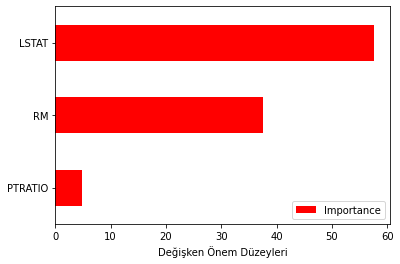

In [129]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

# Prediction

In [132]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

56829.534370307716

# **Model Tuning**

In [133]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [134]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1041 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2013 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 13.6min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [135]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [136]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 3, 
                                      n_estimators = 500, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [137]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

57678.96543902359

In [138]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

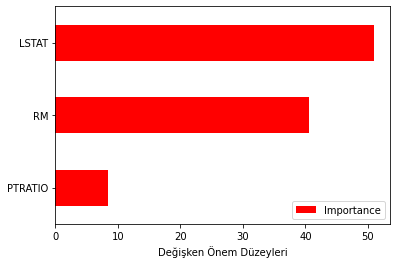

In [139]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [140]:
import xgboost as xgb

In [141]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [142]:
from xgboost import XGBRegressor

In [143]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# Prediction

In [144]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

63510.719492650445

# Model Tuning

In [145]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}



In [147]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.8min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [148]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000}

In [149]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.01, 
                         max_depth = 2, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [150]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

59912.52769554576

# Light GBM

In [151]:
from lightgbm import LGBMRegressor

In [152]:
from lightgbm import LGBMRegressor

In [153]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

# Prediction

In [154]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred))

59823.6797676446

# Model Tuning

In [156]:
lgbm_model

LGBMRegressor()

In [157]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [158]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4096 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5876 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7984 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  3.9min finished


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [159]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000}

In [160]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 2, 
                           n_estimators = 1000,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [161]:
y_pred = lgbm_tuned.predict(X_test)

In [162]:
np.sqrt(mean_squared_error(y_test, y_pred))

59922.39704787653

# CatBoost

In [163]:
from catboost import CatBoostRegressor

In [164]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.032636
0:	learn: 165816.1807584	total: 51.9ms	remaining: 51.9s
1:	learn: 162149.8057516	total: 53.1ms	remaining: 26.5s
2:	learn: 158537.4058000	total: 54ms	remaining: 18s
3:	learn: 155181.1706704	total: 55.3ms	remaining: 13.8s
4:	learn: 152045.1518341	total: 59.9ms	remaining: 11.9s
5:	learn: 148835.7443260	total: 61ms	remaining: 10.1s
6:	learn: 145934.4424443	total: 62ms	remaining: 8.8s
7:	learn: 143064.5320875	total: 63.1ms	remaining: 7.83s
8:	learn: 140251.1383404	total: 64ms	remaining: 7.05s
9:	learn: 137621.6823216	total: 65.1ms	remaining: 6.44s
10:	learn: 135096.2776019	total: 66.1ms	remaining: 5.94s
11:	learn: 132537.8065754	total: 67.1ms	remaining: 5.52s
12:	learn: 129878.2579356	total: 68ms	remaining: 5.16s
13:	learn: 127238.8644482	total: 69ms	remaining: 4.86s
14:	learn: 124875.9866475	total: 70.1ms	remaining: 4.6s
15:	learn: 122419.2188014	total: 71ms	remaining: 4.37s
16:	learn: 120154.9932821	total: 72ms	remaining: 4.16s
17:	learn: 117940.4153956	total

318:	learn: 50373.1145396	total: 361ms	remaining: 770ms
319:	learn: 50367.9644165	total: 362ms	remaining: 769ms
320:	learn: 50351.6556641	total: 368ms	remaining: 779ms
321:	learn: 50315.2180220	total: 370ms	remaining: 778ms
322:	learn: 50289.3459718	total: 371ms	remaining: 777ms
323:	learn: 50233.2308775	total: 372ms	remaining: 776ms
324:	learn: 50145.8975766	total: 373ms	remaining: 775ms
325:	learn: 50102.9367684	total: 375ms	remaining: 774ms
326:	learn: 50070.6140089	total: 376ms	remaining: 773ms
327:	learn: 50023.6069520	total: 377ms	remaining: 772ms
328:	learn: 49963.2882327	total: 378ms	remaining: 771ms
329:	learn: 49918.5740261	total: 379ms	remaining: 769ms
330:	learn: 49913.7599518	total: 380ms	remaining: 769ms
331:	learn: 49866.2830970	total: 382ms	remaining: 768ms
332:	learn: 49771.6333934	total: 383ms	remaining: 767ms
333:	learn: 49732.3946118	total: 384ms	remaining: 766ms
334:	learn: 49695.6224400	total: 385ms	remaining: 764ms
335:	learn: 49674.6220780	total: 386ms	remaining

489:	learn: 43841.1470198	total: 543ms	remaining: 566ms
490:	learn: 43838.8351292	total: 545ms	remaining: 565ms
491:	learn: 43768.0928877	total: 546ms	remaining: 564ms
492:	learn: 43755.8568902	total: 547ms	remaining: 562ms
493:	learn: 43753.4200568	total: 548ms	remaining: 561ms
494:	learn: 43707.9692500	total: 549ms	remaining: 560ms
495:	learn: 43676.6282074	total: 550ms	remaining: 558ms
496:	learn: 43650.4013150	total: 551ms	remaining: 557ms
497:	learn: 43579.4044809	total: 552ms	remaining: 556ms
498:	learn: 43549.6661876	total: 552ms	remaining: 555ms
499:	learn: 43515.7730190	total: 554ms	remaining: 554ms
500:	learn: 43489.1579815	total: 555ms	remaining: 552ms
501:	learn: 43439.4558467	total: 555ms	remaining: 551ms
502:	learn: 43394.4297505	total: 556ms	remaining: 550ms
503:	learn: 43366.0858237	total: 557ms	remaining: 549ms
504:	learn: 43362.8399635	total: 558ms	remaining: 547ms
505:	learn: 43323.7438660	total: 559ms	remaining: 546ms
506:	learn: 43314.7849763	total: 560ms	remaining

668:	learn: 38296.2732794	total: 721ms	remaining: 357ms
669:	learn: 38287.0531984	total: 722ms	remaining: 356ms
670:	learn: 38266.3813597	total: 724ms	remaining: 355ms
671:	learn: 38247.6264650	total: 725ms	remaining: 354ms
672:	learn: 38232.2883460	total: 726ms	remaining: 353ms
673:	learn: 38228.9260667	total: 727ms	remaining: 352ms
674:	learn: 38183.5836434	total: 728ms	remaining: 350ms
675:	learn: 38169.9468422	total: 729ms	remaining: 349ms
676:	learn: 38139.3224060	total: 730ms	remaining: 348ms
677:	learn: 38104.2316590	total: 731ms	remaining: 347ms
678:	learn: 38074.6425223	total: 731ms	remaining: 346ms
679:	learn: 38046.3452425	total: 732ms	remaining: 345ms
680:	learn: 38032.2037287	total: 733ms	remaining: 344ms
681:	learn: 37998.0471667	total: 734ms	remaining: 342ms
682:	learn: 37965.3139789	total: 735ms	remaining: 341ms
683:	learn: 37963.9721294	total: 736ms	remaining: 340ms
684:	learn: 37927.5946409	total: 737ms	remaining: 339ms
685:	learn: 37918.8971893	total: 738ms	remaining

856:	learn: 33615.1481491	total: 901ms	remaining: 150ms
857:	learn: 33614.0543065	total: 903ms	remaining: 149ms
858:	learn: 33579.1484133	total: 904ms	remaining: 148ms
859:	learn: 33559.2886686	total: 905ms	remaining: 147ms
860:	learn: 33554.3401874	total: 906ms	remaining: 146ms
861:	learn: 33519.1155767	total: 907ms	remaining: 145ms
862:	learn: 33494.6905910	total: 907ms	remaining: 144ms
863:	learn: 33480.6802796	total: 908ms	remaining: 143ms
864:	learn: 33454.2785986	total: 909ms	remaining: 142ms
865:	learn: 33432.2372073	total: 910ms	remaining: 141ms
866:	learn: 33428.2565324	total: 911ms	remaining: 140ms
867:	learn: 33407.0804842	total: 912ms	remaining: 139ms
868:	learn: 33385.1383620	total: 913ms	remaining: 138ms
869:	learn: 33371.6766463	total: 914ms	remaining: 137ms
870:	learn: 33362.0660207	total: 915ms	remaining: 135ms
871:	learn: 33333.7039742	total: 916ms	remaining: 134ms
872:	learn: 33328.2144878	total: 917ms	remaining: 133ms
873:	learn: 33314.1060702	total: 918ms	remaining

# Prediction

In [165]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

57783.52717107459

# Model Tuning

In [166]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [167]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [168]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  7.6min finished


0:	learn: 168233.7268781	total: 829us	remaining: 829ms
1:	learn: 167140.7043097	total: 1.74ms	remaining: 868ms
2:	learn: 166079.5887044	total: 2.68ms	remaining: 890ms
3:	learn: 165023.1918816	total: 3.31ms	remaining: 824ms
4:	learn: 163911.6751121	total: 3.95ms	remaining: 786ms
5:	learn: 163012.7441161	total: 4.76ms	remaining: 788ms
6:	learn: 161968.4948111	total: 5.55ms	remaining: 787ms
7:	learn: 160941.2467663	total: 6.27ms	remaining: 778ms
8:	learn: 160026.9067273	total: 7.11ms	remaining: 783ms
9:	learn: 158993.0386356	total: 7.91ms	remaining: 783ms
10:	learn: 157940.8189460	total: 8.7ms	remaining: 782ms
11:	learn: 157009.7863242	total: 9.43ms	remaining: 777ms
12:	learn: 156107.9399355	total: 10.2ms	remaining: 777ms
13:	learn: 155097.2722508	total: 10.9ms	remaining: 766ms
14:	learn: 154048.9569763	total: 11.6ms	remaining: 762ms
15:	learn: 153061.0227616	total: 12.3ms	remaining: 759ms
16:	learn: 152154.0931704	total: 13ms	remaining: 754ms
17:	learn: 151149.1448629	total: 13.8ms	remai

250:	learn: 68436.8318131	total: 172ms	remaining: 514ms
251:	learn: 68368.9593565	total: 173ms	remaining: 514ms
252:	learn: 68311.5862230	total: 174ms	remaining: 513ms
253:	learn: 68238.9175440	total: 174ms	remaining: 512ms
254:	learn: 68158.6206392	total: 175ms	remaining: 512ms
255:	learn: 68090.6106202	total: 176ms	remaining: 511ms
256:	learn: 68033.4639916	total: 176ms	remaining: 509ms
257:	learn: 67968.2344340	total: 177ms	remaining: 508ms
258:	learn: 67900.8649121	total: 177ms	remaining: 507ms
259:	learn: 67840.9222716	total: 178ms	remaining: 506ms
260:	learn: 67792.0127757	total: 178ms	remaining: 505ms
261:	learn: 67728.7558148	total: 179ms	remaining: 504ms
262:	learn: 67683.4266815	total: 180ms	remaining: 503ms
263:	learn: 67610.4770120	total: 180ms	remaining: 502ms
264:	learn: 67532.9042904	total: 181ms	remaining: 501ms
265:	learn: 67466.7124950	total: 181ms	remaining: 500ms
266:	learn: 67403.6309739	total: 182ms	remaining: 499ms
267:	learn: 67347.6814428	total: 182ms	remaining

532:	learn: 60256.5812750	total: 340ms	remaining: 298ms
533:	learn: 60250.7633054	total: 340ms	remaining: 297ms
534:	learn: 60234.5653742	total: 341ms	remaining: 297ms
535:	learn: 60223.8462909	total: 342ms	remaining: 296ms
536:	learn: 60209.5870441	total: 343ms	remaining: 295ms
537:	learn: 60197.8072287	total: 343ms	remaining: 295ms
538:	learn: 60185.7524938	total: 344ms	remaining: 294ms
539:	learn: 60171.5767062	total: 345ms	remaining: 294ms
540:	learn: 60159.4664138	total: 345ms	remaining: 293ms
541:	learn: 60147.5545341	total: 346ms	remaining: 292ms
542:	learn: 60134.7822355	total: 347ms	remaining: 292ms
543:	learn: 60127.5525278	total: 347ms	remaining: 291ms
544:	learn: 60110.3258764	total: 348ms	remaining: 290ms
545:	learn: 60097.7495539	total: 348ms	remaining: 289ms
546:	learn: 60077.7608301	total: 349ms	remaining: 289ms
547:	learn: 60069.8881547	total: 349ms	remaining: 288ms
548:	learn: 60059.2116444	total: 350ms	remaining: 287ms
549:	learn: 60051.8855813	total: 351ms	remaining

822:	learn: 57430.4109697	total: 508ms	remaining: 109ms
823:	learn: 57425.4591445	total: 509ms	remaining: 109ms
824:	learn: 57416.2696098	total: 510ms	remaining: 108ms
825:	learn: 57408.5730429	total: 510ms	remaining: 108ms
826:	learn: 57402.6972105	total: 511ms	remaining: 107ms
827:	learn: 57398.1445326	total: 512ms	remaining: 106ms
828:	learn: 57393.2461407	total: 512ms	remaining: 106ms
829:	learn: 57388.5049491	total: 513ms	remaining: 105ms
830:	learn: 57383.1692945	total: 513ms	remaining: 104ms
831:	learn: 57378.9476019	total: 514ms	remaining: 104ms
832:	learn: 57363.9617425	total: 515ms	remaining: 103ms
833:	learn: 57355.2937945	total: 515ms	remaining: 103ms
834:	learn: 57351.7184373	total: 516ms	remaining: 102ms
835:	learn: 57349.4830175	total: 516ms	remaining: 101ms
836:	learn: 57344.8617491	total: 517ms	remaining: 101ms
837:	learn: 57342.2492084	total: 517ms	remaining: 100ms
838:	learn: 57340.2703028	total: 518ms	remaining: 99.4ms
839:	learn: 57336.8470323	total: 518ms	remainin

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fa40c43b4d0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [169]:
catb_cv_model.best_params_

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.01}

In [170]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.01, 
                               depth = 4)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 168233.7268781	total: 768us	remaining: 767ms
1:	learn: 167140.7043097	total: 1.66ms	remaining: 827ms
2:	learn: 166079.5887044	total: 2.33ms	remaining: 774ms
3:	learn: 165023.1918816	total: 3.03ms	remaining: 754ms
4:	learn: 163911.6751121	total: 3.6ms	remaining: 716ms
5:	learn: 163012.7441161	total: 4.22ms	remaining: 698ms
6:	learn: 161968.4948111	total: 4.79ms	remaining: 680ms
7:	learn: 160941.2467663	total: 5.37ms	remaining: 666ms
8:	learn: 160026.9067273	total: 6.19ms	remaining: 682ms
9:	learn: 158993.0386356	total: 6.75ms	remaining: 668ms
10:	learn: 157940.8189460	total: 7.26ms	remaining: 653ms
11:	learn: 157009.7863242	total: 7.77ms	remaining: 640ms
12:	learn: 156107.9399355	total: 8.29ms	remaining: 629ms
13:	learn: 155097.2722508	total: 8.81ms	remaining: 621ms
14:	learn: 154048.9569763	total: 9.36ms	remaining: 615ms
15:	learn: 153061.0227616	total: 9.87ms	remaining: 607ms
16:	learn: 152154.0931704	total: 10.4ms	remaining: 599ms
17:	learn: 151149.1448629	total: 11ms	remai

305:	learn: 65385.1302832	total: 170ms	remaining: 385ms
306:	learn: 65342.7045608	total: 171ms	remaining: 385ms
307:	learn: 65299.1918418	total: 172ms	remaining: 385ms
308:	learn: 65240.5708007	total: 172ms	remaining: 385ms
309:	learn: 65206.4204728	total: 173ms	remaining: 385ms
310:	learn: 65156.4891592	total: 174ms	remaining: 384ms
311:	learn: 65105.0891273	total: 174ms	remaining: 384ms
312:	learn: 65062.2980623	total: 175ms	remaining: 383ms
313:	learn: 65028.3656560	total: 175ms	remaining: 383ms
314:	learn: 64985.6696589	total: 176ms	remaining: 382ms
315:	learn: 64955.6987672	total: 176ms	remaining: 382ms
316:	learn: 64912.3647294	total: 177ms	remaining: 381ms
317:	learn: 64870.0581196	total: 177ms	remaining: 380ms
318:	learn: 64822.6645775	total: 178ms	remaining: 380ms
319:	learn: 64787.4706829	total: 178ms	remaining: 379ms
320:	learn: 64736.9336737	total: 179ms	remaining: 378ms
321:	learn: 64697.3154076	total: 179ms	remaining: 378ms
322:	learn: 64647.8552927	total: 181ms	remaining

589:	learn: 59554.2698788	total: 337ms	remaining: 234ms
590:	learn: 59549.0527845	total: 338ms	remaining: 234ms
591:	learn: 59539.2706040	total: 339ms	remaining: 234ms
592:	learn: 59527.3496325	total: 340ms	remaining: 233ms
593:	learn: 59515.3843762	total: 341ms	remaining: 233ms
594:	learn: 59504.9457148	total: 341ms	remaining: 232ms
595:	learn: 59497.5231051	total: 342ms	remaining: 232ms
596:	learn: 59481.8044723	total: 342ms	remaining: 231ms
597:	learn: 59462.1510773	total: 343ms	remaining: 231ms
598:	learn: 59456.8149715	total: 344ms	remaining: 230ms
599:	learn: 59444.2440462	total: 344ms	remaining: 230ms
600:	learn: 59429.2990638	total: 345ms	remaining: 229ms
601:	learn: 59412.5279569	total: 346ms	remaining: 228ms
602:	learn: 59404.7521095	total: 346ms	remaining: 228ms
603:	learn: 59395.1550764	total: 347ms	remaining: 227ms
604:	learn: 59374.2878387	total: 348ms	remaining: 227ms
605:	learn: 59362.2492067	total: 348ms	remaining: 226ms
606:	learn: 59353.4762275	total: 349ms	remaining

873:	learn: 57165.3768676	total: 504ms	remaining: 72.7ms
874:	learn: 57160.7812007	total: 505ms	remaining: 72.2ms
875:	learn: 57159.3804328	total: 506ms	remaining: 71.6ms
876:	learn: 57154.8376102	total: 507ms	remaining: 71.1ms
877:	learn: 57151.4287439	total: 507ms	remaining: 70.5ms
878:	learn: 57146.9846678	total: 508ms	remaining: 69.9ms
879:	learn: 57144.8135523	total: 508ms	remaining: 69.3ms
880:	learn: 57140.3448140	total: 509ms	remaining: 68.7ms
881:	learn: 57133.3559797	total: 509ms	remaining: 68.1ms
882:	learn: 57130.6388651	total: 510ms	remaining: 67.6ms
883:	learn: 57128.1396273	total: 511ms	remaining: 67ms
884:	learn: 57121.2620223	total: 511ms	remaining: 66.4ms
885:	learn: 57117.1321173	total: 512ms	remaining: 65.8ms
886:	learn: 57112.7637567	total: 512ms	remaining: 65.2ms
887:	learn: 57109.1499250	total: 513ms	remaining: 64.7ms
888:	learn: 57106.5688210	total: 513ms	remaining: 64.1ms
889:	learn: 57101.1657803	total: 514ms	remaining: 63.5ms
890:	learn: 57094.7087885	total: 

In [171]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

58146.539980713795